In [1]:
# Nural Networks


# We will be uinsg the californai housing dataset 
# Building a MLPRegressor class with 3 hidden layers composed of 50 neurons each. 



In [2]:

from sklearn.datasets import fetch_openml
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
# Fetch the data
housing = fetch_openml('california_housing')
housing.data = housing.data.drop('ocean_proximity', axis=1)

/Users/robertocandelario/anaconda3/envs/hom13/lib/python3.10/site-packages/sklearn/datasets/_openml.py:311: UserWarning: Multiple active versions of the dataset matching the name california_housing exist. Versions may be fundamentally different, returning version 1.
  warn(
/Users/robertocandelario/anaconda3/envs/hom13/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
# Fetch the data
housing = fetch_openml('california_housing')
housing.data = housing.data.drop('ocean_proximity', axis=1)
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42) # Creates the test set 
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42) # Create the training set and the validation set 



In [5]:
# Pipeline to standardize the values. Since Neural Nets use the gradient descent, it can not have values in different scales. 
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)


/Users/robertocandelario/anaconda3/envs/hom13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [6]:
# The model and evaluate its validation error. 
# The model will use ReLU activation function in the hidden layers. 
# It will use a varient of gradient descent called adam to minimize the MSE with some l2 Regularization
rmse = mean_squared_error(y_valid, y_pred, squared=False)
rmse

63089.8282830386

# Working with Tensor Flow and Keras

In [7]:
## Building an image classifier using swquential API
import tensorflow as tf 
print(tf.__version__)
tf.config.list_physical_devices()
#[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]



2.14.1


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [9]:
# WHen importing the MNIST data in Scikit learn and tensorflow the data is populated differently
X_train.shape

(55000, 28, 28)

In [10]:
X_train.dtype

dtype('uint8')

In [11]:
# LEt's scale the pixel intensity down to the 0-1 range by dividing them by 255.0(Making them float values)
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0


In [12]:
# We need to know the names of each class/label we are dealing with
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [13]:
class_names[y_train[0]]

'Ankle boot'

In [14]:
# Let's create the mdoel using sequential API
tf.random.set_seed(42)
model = tf.keras.Sequential() # This is called the squential API
model.add(tf.keras.layers.Input(shape=[28,28])) #  This is the first input layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

2024-07-04 16:09:51.914451: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2024-07-04 16:09:51.914469: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 128.00 GB
2024-07-04 16:09:51.914488: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 48.00 GB
2024-07-04 16:09:51.914544: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-04 16:09:51.914564: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
#model = tf.keras.Sequential([
   #tf.keras.layers.Flatten(input_shape=[28,28]),
    #tf.keras.layers.Dense(300, activation="relu"),
    #tf.keras.layers.Dense(100, activation="relu"),
    #tf.keras.layers.Dense(10, activation="softmax")
#])


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# let's get a list of the layers we have added to the model
model.layers

In [18]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [19]:
model.get_layer("dense") is hidden1

True

In [20]:
# Let's get all the weights for each dense layer
weights, biases = hidden1.get_weights()
weights

array([[-0.00164051,  0.0116131 ,  0.02647164, ...,  0.01584029,
         0.01792625, -0.07219793],
       [ 0.01563106,  0.00803442,  0.04852114, ...,  0.01296495,
         0.00833773, -0.01218711],
       [-0.00543069, -0.00374655,  0.01316848, ...,  0.05841172,
         0.06578112, -0.05577906],
       ...,
       [-0.00319718,  0.03869348,  0.03967424, ...,  0.06597324,
        -0.0049554 , -0.02426448],
       [ 0.02370476,  0.0577984 , -0.02691299, ...,  0.04279734,
         0.02783309, -0.03376188],
       [ 0.01481849,  0.00436016,  0.00139987, ..., -0.07276809,
         0.01470014,  0.03680909]], dtype=float32)

In [21]:
weights.shape

(784, 300)

In [22]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
biases.shape

(300,)

In [37]:
# Compiling the model
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.004)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [38]:
# The model is ready for training 
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 1.4259 - accuracy: 0.8012 - val_loss: 1.0982 - val_accuracy: 0.8030
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.5218 - accuracy: 0.7994 - val_loss: 1.4983 - val_accuracy: 0.7580
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.7056 - accuracy: 0.7975 - val_loss: 3.2924 - val_accuracy: 0.7412
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.9717 - accuracy: 0.7918 - val_loss: 1.3685 - val_accuracy: 0.8160
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 2.2766 - accuracy: 0.7875 - val_loss: 2.8147 - val_accuracy: 0.7438
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 2.6880 - accuracy: 0.7841 - val_loss: 4.8750 - val_accuracy: 0.6986
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 3.4034 - accuracy: 0.7742 - val_loss: 9.5914 - val_accuracy:

In [39]:
# Lets continue to train the model were it left off. Let's see if we can get to 89.8% validation accuracy
#history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

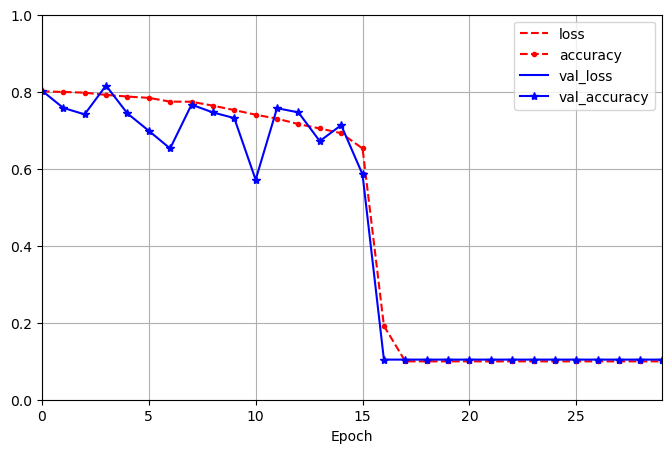

In [40]:
# Lets create a graph to show the training aand validation set accuracy and loss

import matplotlib.pylab as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0,29], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"])
plt.show() 


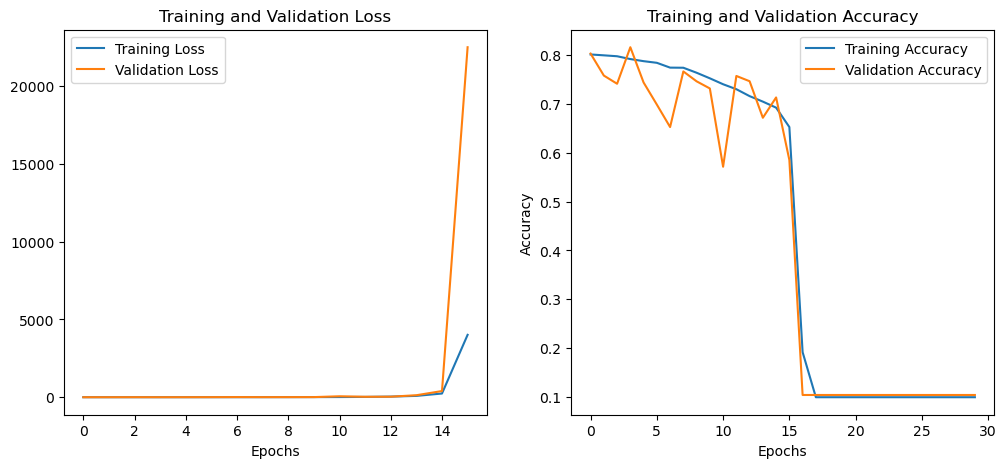

In [41]:
import matplotlib.pyplot as plt



# Extract loss and accuracy metrics from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history.get('accuracy')  # or 'acc' in some versions
val_accuracy = history.history.get('val_accuracy')  # or 'val_acc' in some versions

# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [42]:
# evaluate the model wiht the test sets
# We never want to tweak the model to get a better peformance metric(s) for the test set.
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1000


[nan, 0.10000000149011612]

In [43]:
# Using the model to make predictions
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 33ms/step


array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]], dtype=float32)

In [44]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
y_pred

array([0, 0, 0])

In [45]:
np.array(class_names)[y_pred]

array(['T-shirt/top', 'T-shirt/top', 'T-shirt/top'], dtype='<U11')

## Building a regression MLP using the swquential API

In [48]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer, 
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
1719/1719 [==============================] - 17s 9ms/step - loss: 8.5800 - root_mean_squared_error: 2.9292 - val_loss: 8.4212 - val_root_mean_squared_error: 2.9021
Epoch 2/20
1719/1719 [==============================] - 14s 8ms/step - loss: 8.3020 - root_mean_squared_error: 2.8813 - val_loss: 8.3938 - val_root_mean_squared_error: 2.8974
Epoch 3/20
1719/1719 [==============================] - 14s 8ms/step - loss: 8.2837 - root_mean_squared_error: 2.8782 - val_loss: 8.4199 - val_root_mean_squared_error: 2.9018
Epoch 4/20
1719/1719 [==============================] - 14s 8ms/step - loss: 8.2772 - root_mean_squared_error: 2.8770 - val_loss: 8.4432 - val_root_mean_squared_error: 2.9058
Epoch 5/20
1719/1719 [==============================] - 14s 8ms/step - loss: 8.2710 - root_mean_squared_error: 2.8759 - val_loss: 8.3903 - val_root_mean_squared_error: 2.8968
Epoch 6/20
1719/1719 [==============================] - 15s 8ms/step - loss: 8.2625 - root_mean_squared_error: 2.8745 - val_l

In [49]:
# Building a model with both wide (simple rules) and deep patterns on the californai dataset
# Fetch the data
housing = fetch_openml('california_housing')
housing.data = housing.data.drop('ocean_proximity', axis=1)
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42) # Creates the test set 
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42) # Create the training set and the validation set 



/Users/robertocandelario/anaconda3/envs/hom13/lib/python3.10/site-packages/sklearn/datasets/_openml.py:311: UserWarning: Multiple active versions of the dataset matching the name california_housing exist. Versions may be fundamentally different, returning version 1.
  warn(
/Users/robertocandelario/anaconda3/envs/hom13/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [53]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation='relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])